[View in Colaboratory](https://colab.research.google.com/github/HeshamMahrous/lending_club/blob/master/loan_approval_model.ipynb)

<center> <h1>Baseline: Loan Approval Modeling</h1> </center>
<center> @Authors: Hesham Mahrous, Mahdi Ghelichi</center>

This ipython notebook is sort of a trial to experiement with some data we collected from [Lending Club](https://www.lendingclub.com/info/download-data.action). This work also intends to replicate the results of this paper called [Demystifying the workings of Lending Club](http://cs229.stanford.edu/proj2016spr/report/039.pdf). 

Using different sorts of supervised learning techniques, the paper shows highly accurate models, with an F-measure of up to 98%, that predict if an application will be approved. However, we think these results can be highly biased and irrelevant to our work with Flexiti, but it is a good starting point. This paper also built a model that determines a risk optimized interest rate for every approved loans. They provided an analysis of the performance of different machine learning models applied to their dataset. The data they used is a comprehensive dataset of all applications of peer-to-peer loans on the Lending Club platform between 2007 and 2018. 

Based on an intial view of this dataset taking into account our initial meetings we had with Flexiti it seems like this dataset is close enough with a certain degree of similarity and so to be used to build a baseline method that we can replicate for Flexiti

### Download data From public Git:

  Because it is very difficult to make collab read from a shared folder on google drive we decided to throw our public data that we will use for experimenting in a bit bucket repo. The following line will clone the data repo into your collab machine so that it can be accessed by anyone who shares this document. 

In [0]:
! git clone https://heshammahrous@bitbucket.org/heshammahrous/loan_data.git
import os
arr = os.listdir('/content/loan_data/')
arr

fatal: destination path 'loan_data' already exists and is not an empty directory.


['LoanStats_securev1_2017Q3.csv',
 'LoanStats_securev1_2017Q4.csv',
 'LoanStats_securev1_2017Q1.csv',
 'LoanStats_securev1_2018Q1.csv',
 'loan.csv',
 'LoanStats_securev1_2018Q2.csv',
 '.git',
 'LoanStats_securev1_2017Q2.csv']

### Imports and Library Installs 
  In this section the imports and the library installs are added here.
To install a required library not available in enviroment you can use pip by doing `!pip install something`

In [0]:
import numpy as np
from pandas import read_csv
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from dateutil.parser import parse
import datetime

# The DataSet

  We found some dataset from [Kaggle](https://www.kaggle.com/wendykan/lending-club-loan-data/version/1#) which originated from the same source as mentioned above, but Lending Club has the most recent dataset. In the next couple of lines we will investigate at first the missing columns between the kaggle competition data and Q1 to Q4 of 2017, Q1 and Q2 of 2018 which we downloaded from lending club website. The data they provide has accepted loans and rejected loans. The accepted loans has different sets of loan status indicating whether the loans were paid on time or not. In this work we want to build a model that can predict before hand whether the browers will pay their loans on time, likely to delay in their payements, or default on their payments. 

In this section we will load the data, explore the missing data, and look into the unique values of the data, we will also explain the symantic meaning of the data and hand pick the important features to be used in the machine learning model. We will also clean the data and split the current in progress loans from the completed ones.  

## Missing Data and Columns: 

In [0]:
## Read the CSV data 
q1_17 = read_csv('/content/loan_data/LoanStats_securev1_2017Q1.csv',header = 1)
q1_17 = q1_17[:-2]
q2_17 = read_csv('/content/loan_data/LoanStats_securev1_2017Q2.csv', header=1)
q2_17 = q2_17[:-2]
q3_17 = read_csv('/content/loan_data/LoanStats_securev1_2017Q3.csv',header = 1)
q3_17 = q3_17[:-2]
q4_17 = read_csv('/content/loan_data/LoanStats_securev1_2017Q4.csv',header = 1)
q4_17 = q4_17[:-2]
q1_18 = read_csv('/content/loan_data/LoanStats_securev1_2018Q1.csv',header = 1)
q1_18 = q1_18[:-2]
q2_18 = read_csv('/content/loan_data/LoanStats_securev1_2018Q2.csv',header = 1)
q2_18 = q2_18[:-2]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,118) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,129,130,131,134,135,136,139) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=inter

In [0]:
q1_17.isnull().sum()

id                                                0
member_id                                     96779
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      6892
emp_length                                     6792
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url                                               0
desc        

In [0]:
q2_17.isnull().sum()

id                                                 0
member_id                                     105451
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       6782
emp_length                                      6697
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
q3_17.isnull().sum()

id                                                 0
member_id                                     122701
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       8801
emp_length                                      8660
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
q4_17.isnull().sum()

id                                                 0
member_id                                     118648
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       9869
emp_length                                      9722
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
q1_18.isnull().sum()

id                                                 0
member_id                                     107864
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                       9613
emp_length                                      9428
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [0]:
q2_18.isnull().sum()

id                                                 0
member_id                                     130772
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      10662
emp_length                                     10468
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

  As we can see there are alot of missing data that we can not rely on. Additionaly there seems to have some missing columns from the most recent data which are also missing in the old data. In the next section we created a function that returns these missing columns between the old and the new data.

  As we can see next there is no missing columns between the years 2017 and 2018, but more features was added from the old data to the new data. Ideally a good model should perform well with the least available data possible, for this reason we will remove the newly added data. Also, we are going to remove the columns with lots of missing data. 

In [0]:
def get_missing_columns(df1, df2): 
  '''
  This function takes two dataframes and returns a list of missing columns in 
  both of them.
  '''
  colnames1 = set(df1.columns)
  colnames2 = set(df2.columns)
  missings = colnames1 ^ colnames2 # XOR
  return set(missings)

print (get_missing_columns(q1_17, q2_17))
print (get_missing_columns(q2_17, q3_17))
print (get_missing_columns(q3_17, q4_17))
print (get_missing_columns(q4_17, q1_18))
print (get_missing_columns(q1_18, q2_18))

set()
set()
set()
set()
set()


  After removing the newly added columns in the data we calculated a percentage of missing data in the columns. You can clearly find that there are alot of columns that are not populated with any data. 

In [0]:
df_list = [q1_17, q2_17, q3_17, q4_17, q1_18, q2_18]
data_set = pd.concat(df_list)
percent_missing_columns = data_set.isnull().sum()*100.0/len(data_set)

columns = percent_missing_columns.index.values 
for col in columns: 
  print (col, percent_missing_columns[col])
  print ('')

id 0.0

member_id 100.0

loan_amnt 0.0

funded_amnt 0.0

funded_amnt_inv 0.0

term 0.0

int_rate 0.0

installment 0.0

grade 0.0

sub_grade 0.0

emp_title 7.712964388059483

emp_length 7.588077072477152

home_ownership 0.0

annual_inc 0.0

verification_status 0.0

issue_d 0.0

loan_status 0.0

pymnt_plan 0.0

url 0.0

desc 100.0

purpose 0.0

title 0.0

zip_code 0.00014658135631729

addr_state 0.0

dti 0.1615326546616536

delinq_2yrs 0.0

earliest_cr_line 0.0

fico_range_low 0.0

fico_range_high 0.0

inq_last_6mths 0.0

mths_since_last_delinq 52.145877765806965

mths_since_last_record 84.1659887278937

open_acc 0.0

pub_rec 0.0

revol_bal 0.0

revol_util 0.11008259859428479

total_acc 0.0

initial_list_status 0.0

out_prncp 0.0

out_prncp_inv 0.0

total_pymnt 0.0

total_pymnt_inv 0.0

total_rec_prncp 0.0

total_rec_int 0.0

total_rec_late_fee 0.0

recoveries 0.0

collection_recovery_fee 0.0

last_pymnt_d 4.929824175663097

last_pymnt_amnt 0.0

next_pymnt_d 13.614329793393578

last_cred

In the next section we basically filter out the columns that has at most 10% missing data. Turns out that only 10 columns out of 73 were dropped and the rest were at least 90% populated with data.

Additionaly, at a later stage we plan to filter the most important columns that are good predictors to the loan status. But first lets look at the loan status labels and the data features so that it semantically "make senses". 

In [0]:
missing_percent_threshold = 10
# only keep the columns that has less than 10% of missing data
filtered_columns = percent_missing_columns.index[percent_missing_columns < missing_percent_threshold]
data_set = data_set[filtered_columns]
data_set.isnull().sum()*100.0/len(data_set)

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     7.712964
emp_length                    7.588077
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.000000
zip_code                      0.000147
addr_state                    0.000000
dti                           0.161533
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
fico_range_low           

In [0]:
list(data_set.loan_status.unique())

['Charged Off',
 'Current',
 'Late (31-120 days)',
 'Fully Paid',
 'In Grace Period',
 'Late (16-30 days)',
 'Default',
 'Issued']

As you can see above the unique values of the loan status that we will try to predict. The following table shows the loan status descriptions.


| Loan Status 	| Meaning 	|
|--------------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|
| Charged Off 	| Loan for which there is no longer a reasonable expectation of further payments. A charge off happens for those who defaulted.	|
| Current 	| Loan is up to date on all outstanding payments. 	|
| Late (31-120 days) 	| Loan has not been current for 31 to 120 days. 	|
| Fully Paid 	| Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment. 	|
| In Grace Period 	| Loan is past due but within the 15-day grace period. 	|
| Late (16-30 days) 	| Loan has not been current for 16 to 30 days. 	|
| Default 	| Loan has not been current for 121 days or more. 	|
| Issued 	| New loan that has passed all LendingClub reviews, received full funding, and has been issued. 	|

*Note we will exclude the current and newly issued loans as they are the loans that are still in progress so we will exclude them from the dataset.*


Now lets rethink this for a second and understand what that actually mean for the business. Out of these guys who are late, default or Fully paid, who actually ended up paying interest and who didnt ? How many of those who ended up fully paying the principle loan and ended up paying interest ?

Lets face it in this business you want to maximize your return on investment so we need a model that can accept as much people as possible who wont default on their payements but also be late on their payments enought to pay interest. 

In [0]:
def relabel_loan_status(df): 
  def func(x):
    if x['total_pymnt'] >= x['funded_amnt'] :
      return 1
    elif x['total_pymnt'] < x['funded_amnt']:
      return 0
    
  df['loan_status'] = df.apply(func, axis=1)
  return df 

def seperate_data(df): 
  loan_in_progress = df[(df.loan_status == 'Current') | (df.loan_status == 'Issued')].copy()
  loan_in_progress = loan_in_progress.reset_index(drop=True)
  
  loan_in_progress = loan_in_progress.drop(['loan_status'], axis=1)
  loans = df[(df.loan_status != 'Current') & (df.loan_status != 'Issued') ].copy()
  loans = loans.reset_index(drop=True)
  
  return loans, loan_in_progress

In [0]:
loans, loan_in_progress = seperate_data(data_set)
loans = relabel_loan_status(loans)
print ('loans in progress', loan_in_progress.shape)
print ('loans finished', loans.shape)

loans in progress (571323, 104)
loans finished (110892, 105)


In [0]:
fltr = (loans.loan_status.values==1) & (loans.total_pymnt.values > loans.funded_amnt.values)
print('amount_funded',loans.funded_amnt.values[fltr][0:10])
print('tot_coll_amt', loans.tot_coll_amt.values[fltr][0:10])
print('total_rec_late_fee', loans.total_rec_late_fee.values[fltr][0:10])
print('total_rec_int', loans.total_rec_int.values[fltr][0:10])
print('total_rec_prncp',loans.total_rec_prncp.values[fltr][0:10])
print('total_pymnt',loans.total_pymnt.values[fltr][0:10])
print('status',loans.loan_status.values[fltr][0:10])

amount_funded [12000. 10000.  4800.  5000. 35000. 17000. 10000. 16000.  3600. 19500.]
tot_coll_amt [  0.   0.   0. 531.   0.   0.   0.   0.   0.   0.]
total_rec_late_fee [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
total_rec_int [ 773.27  970.71  248.71  168.91 1875.08  282.8   365.37 2001.02  165.1
 1202.1 ]
total_rec_prncp [12000. 10000.  4800.  5000. 35000. 17000. 10000. 16000.  3600. 19500.]
total_pymnt [12773.27239645 10970.7137135   5048.70651634  5168.90637713
 36875.07891676 17282.80279242 10365.36835829 18001.02117052
  3765.09875144 20702.0974504 ]
status [1 1 1 1 1 1 1 1 1 1]


## Now Lets Semantically Understand the Features: 

It is very important to realize the effect of the featues and understand how these data are collected during the process of a loan application. We have seen lots of work that accidently created biased models to predict the loan application. For example you can not predict whether a loan will default or not knowing already before hand the grade and sub-grade of the loan !! Thats like creating a model that predicts the next closing prices of stock market by using the next candles low, high, and open prices. 

In this subsections we will look into the unique values of the data. It is worth to note that there are some columns in the data that are symantically obvious and straight forward, but there are other columns needs explanation to those who are not in the financial loaning business. We will do our best to explain these ones in the next subsections. 

### How many unique values do we have in the data ?
The next couple of lines will show how many unique values in the data as it helps to symantically understand it. 

In [0]:
def no_unique_values(x):
  return len(x.unique()) 
loans.apply(no_unique_values, axis=0)

id                            110892
loan_amnt                       1479
funded_amnt                     1479
funded_amnt_inv                 1492
term                               2
int_rate                         106
installment                    19303
grade                              7
sub_grade                         35
emp_title                      39415
emp_length                        12
home_ownership                     5
annual_inc                      9345
verification_status                3
issue_d                           18
loan_status                        2
pymnt_plan                         2
url                           110892
purpose                           13
title                             12
zip_code                         876
addr_state                        50
dti                             5327
delinq_2yrs                       22
earliest_cr_line                 646
fico_range_low                    38
fico_range_high                   38
i

In [0]:
loans.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                     int64
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc    

### What does the data actually say about these loans ?

In this sub-sub-section we will read the unique values of each columns and provide a brief explanations to the one that are not obvious especially to those who are not familiar with financial data. This is very important before doing any feature selections because we need to take out the information or the columns that wont be available at the time the loan application is submitted for approval. Unfortuently lots of published work did not take into account this problem which makes their models biased and unrealistic


In [0]:
columns = loans.columns.values 
for col in columns: 
  print (col, 'unique%',round(len(loans[col].unique())/len(loans),2), 'no unique values', len(loans[col].unique()) )
  print (loans[col].unique()[0:5]) 
  print ('')

id unique% 1.0 no unique values 110892
[103739310 102675947 98692718 104210150 104046532]

loan_amnt unique% 0.01 no unique values 1479
[ 8400. 14000. 20000. 12000. 10000.]

funded_amnt unique% 0.01 no unique values 1479
[ 8400. 14000. 20000. 12000. 10000.]

funded_amnt_inv unique% 0.01 no unique values 1492
[ 8400. 14000. 20000. 12000. 10000.]

term unique% 0.0 no unique values 2
[' 36 months' ' 60 months']

int_rate unique% 0.0 no unique values 106
[' 11.39%' ' 15.99%' ' 12.74%' '  6.99%' ' 14.99%']

installment unique% 0.17 no unique values 19303
[276.56 340.38 671.38 370.48 335.69]

grade unique% 0.0 no unique values 7
['B' 'C' 'A' 'E' 'D']

sub_grade unique% 0.0 no unique values 35
['B3' 'C5' 'C1' 'A2' 'C4']

emp_title unique% 0.36 no unique values 39415
['IT Tech' 'Teacher' 'Project Manager' 'signmaker/waterjet'
 'Product Specialist ']

emp_length unique% 0.0 no unique values 12
['8 years' '10+ years' '< 1 year' '1 year' '2 years']

home_ownership unique% 0.0 no unique values 5
[

In the above output it shows some column names and the unique values of these column names. Some of them are straight forward to understand and some of them are not clear. I refered to the [data dictionary](https://www.lendingclub.com/info/download-data.action) on lending clubs website for the full descriptions. I am only going to document and describe the subset we extracted from the previous steps. If you need to know but for more information on other columns you can view them on the link provided above. 

The following table shows the columns that we intend to keep and the ones that we will remove from the dataset. The column is also showing the description of these coulmns. We decided on the columns that we want to remove because some of these features will not be available during the time an application is submitted. For example: intreset rate is determined after the application is approved or rejected, or funded amount. Also other biasing featuers such as total payements made up to date. Anything we think it wont be possible that is available during the time of application is removed. Other columns are removed such as url and application id, they are unique data and they provide no predictability to the model. 

| column Name 	| description 	| Kept or Removed 	|
|----------------------------	|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------	|-----------------	|
| id 	| A unique LC assigned ID for the loan listing. 	| Removed 	|
| funded_amnt 	| The total amount committed to that loan at that point in time. 	| Removed 	|
| funded_amnt_inv 	| The total amount committed by investors for that loan at that point in time. 	| Removed 	|
| term 	| The number of payments on the loan. Values are in months and can be either 36 or 60. 	| Removed 	|
| int_rate 	| Interest Rate on the loan 	| Removed 	|
| installment 	| The monthly payment owed by the borrower if the loan originates. 	| Removed 	|
| grade 	| LC assigned loan grade 	| Removed 	|
| sub_grade 	| LC assigned loan subgrade 	| Removed 	|
| issue_d 	| The month which the loan was funded 	| Removed 	|
| loan_status 	| Current status of the loan 	| Removed 	|
| pymnt_plan 	| Indicates if a payment plan has been put in place for the loan 	| Removed 	|
| url 	| URL for the LC page with listing data. 	| Removed 	|
| title 	| The loan title provided by the borrower 	| Removed 	|
| out_prncp 	| Remaining outstanding principal for total amount funded 	| Removed 	|
| out_prncp_inv 	| Remaining outstanding principal for portion of total amount funded by investors 	| Removed 	|
| total_pymnt 	| Payments received to date for total amount funded 	| Removed 	|
| total_pymnt_inv 	| Payments received to date for portion of total amount funded by investors 	| Removed 	|
| total_rec_prncp 	| Principal received to date 	| Removed 	|
| total_rec_int 	| Interest received to date 	| Removed 	|
| total_rec_late_fee 	| Late fees received to date 	| Removed 	|
| recoveries 	| post charge off gross recovery 	| Removed 	|
| collection_recovery_fee 	| post charge off collection fee 	| Removed 	|
| last_pymnt_d 	| Last month payment was received 	| Removed 	|
| last_pymnt_amnt 	| Last total payment amount received 	| Removed 	|
| collections_12_mths_ex_med 	| Number of charge-offs within 12 months 	| Removed 	|
| policy_code 	| publicly available policy_code=1 new products not publicly available policy_code=2 	| Removed 	|
| acc_now_delinq 	| The number of accounts on which the borrower is now delinquent. 	| Removed 	|
| tot_coll_amt 	| Total collection amounts ever owed 	| Removed 	|
| loan_amnt 	| The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. 	| kept 	|
| emp_title 	| The job title supplied by the Borrower when applying for the loan.* 	| kept 	|
| emp_length 	| Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 	| kept 	|
| home_ownership 	| The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. 	| kept 	|
| annual_inc 	| The self-reported annual income provided by the borrower during registration. 	| kept 	|
| verification_status 	| Indicates if income was verified by LC, not verified, or if the income source was verified 	| kept 	|
| purpose 	| A category provided by the borrower for the loan request. 	| kept 	|
| zip_code 	| zip code  	| kept 	|
| addr_state 	| state 	| kept 	|
| dti 	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. 	| kept 	|
| delinq_2yrs 	| The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years 	| kept 	|
| earliest_cr_line 	| The month the borrower's earliest reported credit line was opened 	| kept 	|
| inq_last_6mths 	| The number of inquiries in past 6 months (excluding auto and mortgage inquiries) 	| kept 	|
| open_acc 	| The number of open credit lines in the borrower's credit file. 	| kept 	|
| pub_rec 	| Number of derogatory public records 	| kept 	|
| revol_bal 	| Total credit revolving balance 	| kept 	|
| revol_util 	| Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. 	| kept 	|
| total_acc 	| The total number of credit lines currently in the borrower's credit file 	| kept 	|
| initial_list_status 	| The initial listing status of the loan. Possible values are – W, F 	| kept 	|
| last_credit_pull_d 	| The most recent month LC pulled credit for this loan 	| kept 	|
| application_type 	| Indicates whether the loan is an individual application or a joint application with two co-borrowers 	| kept 	|
| tot_cur_bal 	| Total current balance of all accounts 	| kept 	|
| open_acc_6m 	| Number of open trades in last 6 months 	| kept 	|
| open_il_12m 	| Number of installment accounts opened in past 12 months 	| kept 	|
| open_il_24m 	| Number of installment accounts opened in past 24 months 	| kept 	|
| mths_since_rcnt_il 	| mths_since_rcnt_il 	| kept 	|
| total_bal_il 	| Total current balance of all installment accounts 	| kept 	|
| open_rv_12m 	| Number of revolving trades opened in past 12 months 	| kept 	|
| open_rv_24m 	| Number of revolving trades opened in past 24 months 	| kept 	|
| max_bal_bc 	| max_bal_bc 	| kept 	|
| all_util 	| Balance to credit limit on all trades 	| kept 	|
| total_rev_hi_lim 	| Total revolving high credit/credit limit 	| kept 	|
| inq_fi 	| Number of personal finance inquiries 	| kept 	|
| total_cu_tl 	| Number of finance trades 	| kept 	|
| inq_last_12m 	| Number of credit inquiries in past 12 months 	| kept 	|







In [0]:
 columns_to_remove = [
     'id',
     'funded_amnt_inv',
     'term',
     'int_rate',
     'installment',
     'grade',
     'sub_grade',
     'issue_d',
     'loan_status',
     'pymnt_plan',
     'url',
     'title',
     'emp_title',
     'zip_code',
     'addr_state',
     'initial_list_status',
     'out_prncp',
     'out_prncp_inv',
     'total_pymnt_inv',
     'total_rec_prncp',
     'total_rec_int',
     'recoveries',
     'collection_recovery_fee',
     'last_pymnt_d',
     'last_pymnt_amnt',
     'collections_12_mths_ex_med',
     'policy_code',
     'acc_now_delinq',
     'chargeoff_within_12_mths',
     'delinq_amnt',
     'disbursement_method',
     'debt_settlement_flag',
     'hardship_flag']
loans_filtered = loans.drop(columns_to_remove, axis=1)
y = loans.loan_status.values

# Data Cleaning and Pre-Processing

Now after we have made sure that our data does not have any biased information to predict the future and we filited the columns that provides information that should be available during the time of an applicaiton. In this section we will look into the missing data and clean the data furture so that we can use it in our machine leanring algorithim. 

First we look at misisng data and impute them with misisng zeros or the label 'unknown' in case of categorical data. After that we will pre process the data by converting the categorical data to numerical integers and standerdize them. As for the numerical columns we will normalize them and standerdize them as well.  



## NaN Cleaning: 

From the look of it we have `emp_title`, `emp_length`, `mths_sice_recnt_il`, `last_credit_pull_date` have missing values. The next script will take care of that. 


In [0]:
loans_filtered.loc[loans_filtered.emp_length.isna(),'emp_length'] =  '< 1 year'
loans_filtered.loc[loans_filtered.mths_since_rcnt_il.isna(),'mths_since_rcnt_il'] =  loans_filtered.mths_since_rcnt_il.median()
loans_filtered.loc[loans_filtered.dti.isna(),'dti'] =  loans_filtered.dti.median()
loans_filtered.loc[loans_filtered.all_util.isna(),'all_util'] =  loans_filtered.all_util.median()
loans_filtered.loc[loans_filtered.avg_cur_bal.isna(),'avg_cur_bal'] =  loans_filtered.avg_cur_bal.median()
loans_filtered.loc[loans_filtered.bc_util.isna(),'bc_util'] =  loans_filtered.bc_util.median()
loans_filtered.loc[loans_filtered.bc_open_to_buy.isna(),'bc_open_to_buy'] =  loans_filtered.bc_open_to_buy.median()
loans_filtered.loc[loans_filtered.mo_sin_old_il_acct.isna(),'mo_sin_old_il_acct'] =  loans_filtered.mo_sin_old_il_acct.median()
loans_filtered.loc[loans_filtered.mths_since_recent_bc.isna(),'mths_since_recent_bc'] =  loans_filtered.mths_since_recent_bc.median()
loans_filtered.loc[loans_filtered.num_tl_120dpd_2m.isna(),'num_tl_120dpd_2m'] =  loans_filtered.num_tl_120dpd_2m.median()
loans_filtered.loc[loans_filtered.percent_bc_gt_75.isna(),'percent_bc_gt_75'] =  loans_filtered.percent_bc_gt_75.median()
loans_filtered.loc[loans_filtered.last_credit_pull_d.isna(),'last_credit_pull_d'] = 'unkown'

In [0]:
# Now lets check the nans again. 
print (loans_filtered.emp_length.isna().sum())
print (loans_filtered.mths_since_rcnt_il.isna().sum())
print (loans_filtered.last_credit_pull_d.isna().sum())


0
0
0


In [0]:
columns = loans_filtered.columns.values 
for col in columns: 
  print (col, ', number of NA', loans_filtered[col].isnull().sum())
  print (loans_filtered[col].unique()[0:5]) 
  print ('')

loan_amnt , number of NA 0
[ 8400. 14000. 20000. 12000. 10000.]

funded_amnt , number of NA 0
[ 8400. 14000. 20000. 12000. 10000.]

emp_length , number of NA 0
['8 years' '10+ years' '< 1 year' '1 year' '2 years']

home_ownership , number of NA 0
['MORTGAGE' 'RENT' 'OWN' 'NONE' 'ANY']

annual_inc , number of NA 0
[ 50000.  43000. 135000.  56000.  40000.]

verification_status , number of NA 0
['Source Verified' 'Not Verified' 'Verified']

purpose , number of NA 0
['other' 'debt_consolidation' 'home_improvement' 'credit_card'
 'major_purchase']

dti , number of NA 0
[15.63 21.8  12.55 17.9   8.85]

delinq_2yrs , number of NA 0
[0. 1. 2. 4. 3.]

earliest_cr_line , number of NA 0
['Apr-2005' 'Oct-1995' 'Aug-2005' 'Aug-1995' 'Mar-1997']

fico_range_low , number of NA 0
[675. 670. 695. 775. 700.]

fico_range_high , number of NA 0
[679. 674. 699. 779. 704.]

inq_last_6mths , number of NA 0
[0. 1. 2. 3. 4.]

open_acc , number of NA 0
[14.  3. 21. 13.  7.]

pub_rec , number of NA 0
[0. 1. 2. 3.

## Pre-Processing: 

In this section we will normalize the data and convert the strings that should be numerical maning such as zipcode, revol_util...etc. The data will be standardized to the highest value possible, so the data should be between 0 to 1. 
we will also change the categorical data to labels. 
Not all columns are treated the same the ones that need special parsing and processing for example are zipcode, all the dates, emp_length, and revol_util. 


In [0]:
loans_filtered_copy = loans_filtered.copy()

In [0]:
def standardize_to_max_value(df, cols):
  df_copy = df.copy()
  for col in cols:
    values = df_copy[col].values
    values = values / (max(values)*1.1)
    df_copy.loc[:,col] = values
  return df_copy
def convert_string_to_cat_integers(df, cols):
  df_copy = df.copy()
  for col in cols: 
    values = df_copy[col].values
    values = LabelEncoder().fit_transform(values)
    df_copy.loc[:,col] = values
  return df_copy
def parse_dates_to_previous_no_days(df, cols):
  df_copy = df.copy()
  now = datetime.datetime.now()
  for col in cols: 
    values = df_copy[col].values
    values = np.array([0 if x == 'unkown' else int((now - parse(x)).days/30) for x in values])
    df_copy.loc[:,col] = values
  return df_copy

In [0]:
emp_length = loans_filtered_copy.emp_length.values
t = []
for x in emp_length: 
  x = ''.join(e for e in x if e.isalnum())
  x = x.strip('years')
  x = x.strip('year')
  t.append(int(x))
emp_length = np.array(t)
loans_filtered.emp_length = emp_length
loans_filtered.emp_length.head()

0     8
1    10
2     1
3    10
4    10
Name: emp_length, dtype: int64

In [0]:
revol_util = loans_filtered_copy.revol_util.values
revol_util = np.array([float(x.strip('%')) for x in revol_util.astype(str)])
loans_filtered.revol_util = revol_util
loans_filtered.loc[loans_filtered.revol_util.isna(),'revol_util'] =  loans_filtered.revol_util.median()
loans_filtered.revol_util.head()


0    30.3
1    99.1
2    49.1
3    24.0
4    55.9
Name: revol_util, dtype: float64

In [0]:
loans_filtered_copy2 = loans_filtered.copy()
loans_filtered_processed = parse_dates_to_previous_no_days(loans_filtered_copy2,['earliest_cr_line','last_credit_pull_d'])
loans_filtered_processed = convert_string_to_cat_integers(loans_filtered_processed,['home_ownership','verification_status','purpose',
                                                                      'application_type'])
loans_filtered_processed = standardize_to_max_value(loans_filtered_processed,loans_filtered_processed.columns.values)

In [0]:
d = pd.read_csv('/content/loan_data/column_names.csv').iloc[:,0:2]
col_indx = [True if x in loans_filtered_processed.columns else False for x in d.iloc[:,0]]
d.iloc[col_indx,:].to_csv('loan_data/required_data.csv')
! cd loan_data && git config --global user.email hesham.m.mahrous@gmail.com && git add --all && git commit -m 'required data' && git push && Thisisme2

On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)

nothing to commit, working tree clean


In [0]:
! cd loan_data  && git push && Thisisme2

Password for 'https://heshammahrous@bitbucket.org': 

In [0]:
columns = loans_filtered_processed.columns.values 
for col in columns: 
  print (col, ', number of NA', loans_filtered_processed[col].isnull().sum())
  print (loans_filtered_processed[col].unique()[0:10]) 

loan_amnt , number of NA 0
[0.19090909 0.31818182 0.45454545 0.27272727 0.22727273 0.10909091
 0.11363636 0.79545455 0.38636364 0.09090909]
funded_amnt , number of NA 0
[0.19090909 0.31818182 0.45454545 0.27272727 0.22727273 0.10909091
 0.11363636 0.79545455 0.38636364 0.09090909]
emp_length , number of NA 0
[0.72727273 0.90909091 0.09090909 0.18181818 0.27272727 0.45454545
 0.81818182 0.63636364 0.36363636 0.54545455]
home_ownership , number of NA 0
[0.22727273 0.90909091 0.68181818 0.45454545 0.        ]
annual_inc , number of NA 0
[0.00477315 0.00410491 0.0128875  0.00534592 0.00381852 0.01527407
 0.00649148 0.01088278 0.01145555 0.01384213]
verification_status , number of NA 0
[0.45454545 0.         0.90909091]
purpose , number of NA 0
[0.60606061 0.15151515 0.22727273 0.07575758 0.37878788 0.
 0.45454545 0.83333333 0.53030303 0.3030303 ]
dti , number of NA 0
[0.01422331 0.01983802 0.01142051 0.01628902 0.00805351 0.01152061
 0.02047502 0.01277641 0.00765311 0.03058513]
delinq_2yrs

# Feature Selections

At this point and as you can see in the last output section from pre-processing we can see that all the data are standardized between 0 and 1. In this section we want to learn a little bit about its distributions and see if we want to further exclude some statistically irrelevant distributions to the model. 

## Random Forests Feature Selection:

In [0]:
from sklearn.ensemble import RandomForestClassifier

def evaluate_rf(x_test,y_test, y_test_encoded,rf,feature_list,threshold = 0.5): 
  def get_labels(y):
    return [ np.argmax(x) for x in y ]
  scores = rf.score(x_test, y_test_encoded)
  print("====================[TEST SCORE]====================")
  print("%acc: ", (scores*100))
  prediction = rf.predict_proba(x_test)
  pred = [ 1 if x[1] > threshold else 0 for x in prediction]
  #pred = get_labels(prediction)
  C = confusion_matrix(y_test, pred)
  print ('Confusion Matrix')
  print (C)
  print ('Classiication Report')
  print (classification_report(y_test, pred))

def feature_importance(rf,feature_list):
  print("====================[Feature Importance]====================")
  # Get numerical feature importances
  importances = list(rf.feature_importances_)
  # List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
  # Sort the feature importances by most important first
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
  # Print out the feature and importances 
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
  return feature_importances

financial_columns=['total_pymnt','funded_amnt','tot_coll_amt','total_rec_late_fee']
loans_filtered_processed_after_drops = loans_filtered_processed.drop(financial_columns,axis =1)
feature_list = list(loans_filtered_processed_after_drops.columns)
x = loans_filtered_processed_after_drops.values
indx = [i for i in range(len(x))]
indx = [i for i in range(len(x))]
random.shuffle(indx)
random.shuffle(indx)
row_train = int(len(indx)*0.6)
x = (x-x.mean())/x.std()
x_train, y_train = x[indx[:row_train]], y[indx[:row_train]]

clf = RandomForestClassifier(n_estimators=200)
clf.fit(x_train, y_train)
feature_list = list(loans_filtered_processed_after_drops.columns)
feature_importances = feature_importance(clf,feature_list)
unwanted_features = [x[0] for x in feature_importances if x[1]==0.0] 


====================[Feature Importance]====================
Variable: last_fico_range_low  Importance: 0.24
Variable: last_fico_range_high Importance: 0.23
Variable: last_credit_pull_d   Importance: 0.06
Variable: loan_amnt            Importance: 0.02
Variable: dti                  Importance: 0.02
Variable: emp_length           Importance: 0.01
Variable: annual_inc           Importance: 0.01
Variable: earliest_cr_line     Importance: 0.01
Variable: fico_range_low       Importance: 0.01
Variable: fico_range_high      Importance: 0.01
Variable: open_acc             Importance: 0.01
Variable: revol_bal            Importance: 0.01
Variable: revol_util           Importance: 0.01
Variable: total_acc            Importance: 0.01
Variable: application_type     Importance: 0.01
Variable: tot_cur_bal          Importance: 0.01
Variable: mths_since_rcnt_il   Importance: 0.01
Variable: total_bal_il         Importance: 0.01
Variable: open_rv_24m          Importance: 0.01
Variable: max_bal_bc       

## Which of these data features available in Flexiti's Data ?

For now we need access but from an intial view i think we should find most of them. 

# Machine Learning Models

## Split data:

Shape of x_train: (66535, 47)
Shape of y_train: (66535,)
Shape of x_test: (44357, 47)
Shape of y_test: (44357,)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


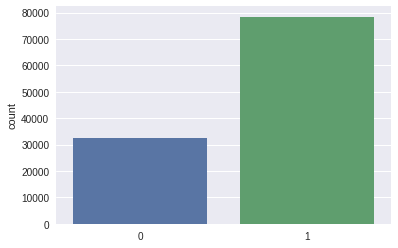

In [0]:
drops = financial_columns
#drops.extend(unwanted_features)
# Train-Test split
financials = loans_filtered[drops]
loans_filtered_processed_after_drops = loans_filtered_processed.drop(drops,axis =1)
feature_list = list(loans_filtered_processed_after_drops.columns)
x = loans_filtered_processed_after_drops.values
indx = [i for i in range(len(x))]
indx = [i for i in range(len(x))]
random.shuffle(indx)
random.shuffle(indx)
row_train = int(len(indx)*0.6)
x = (x-x.mean())/x.std()
x_train, x_test, y_train, y_test = x[indx[:row_train]], x[indx[row_train:]], y[indx[:row_train]], y[indx[row_train:]]
financials_test = financials.loc[indx[row_train:],:]
                                   
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)
sns.countplot(y)


In [0]:
def encode_neural_net_y(y):
    encoder = LabelEncoder()
    encoder.fit(y)
    encoded_y = encoder.transform(y)
    new_y = np_utils.to_categorical(encoded_y)
    return new_y

# Neural Network model
y_train_encoded = y_train#encode_neural_net_y(y_train)
y_test_encoded = y_test #encode_neural_net_y(y_test)

## Deep Dense Network: 

In [0]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.normalization import BatchNormalization
from sklearn.utils import class_weight

# create model
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=x_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                3072      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
__________

In [0]:
cw = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
model.fit( x_train, y_train_encoded, epochs=10, batch_size=128, verbose=1,validation_data=(x_test, y_test))

Train on 66535 samples, validate on 44357 samples
Epoch 1/10
66535/66535 [==============================] - 10s 151us/step - loss: 0.3358 - acc: 0.8634 - val_loss: 0.3182 - val_acc: 0.8687
Epoch 2/10
66535/66535 [==============================] - 9s 129us/step - loss: 0.2895 - acc: 0.8806 - val_loss: 0.2876 - val_acc: 0.8810
Epoch 3/10
66535/66535 [==============================] - 9s 129us/step - loss: 0.2743 - acc: 0.8870 - val_loss: 0.2951 - val_acc: 0.8798
Epoch 4/10
66535/66535 [==============================] - 9s 130us/step - loss: 0.2676 - acc: 0.8887 - val_loss: 0.2710 - val_acc: 0.8868
Epoch 5/10
66535/66535 [==============================] - 9s 129us/step - loss: 0.2623 - acc: 0.8900 - val_loss: 0.2677 - val_acc: 0.8903
Epoch 6/10
66535/66535 [==============================] - 9s 137us/step - loss: 0.2606 - acc: 0.8917 - val_loss: 0.2796 - val_acc: 0.8796
Epoch 7/10
66535/66535 [==============================] - 9s 138us/step - loss: 0.2590 - acc: 0.8926 - val_loss: 0.2722 -

### Evaluations and Results

In [0]:
def evaluate_model(x_test,y_test, y_test_encoded,model, threshold = 0.5): 
  def get_labels(y):
    return [ np.argmax(x) for x in y ]
  scores = model.evaluate(x_test, y_test_encoded, verbose=0)
  print("====================[TEST SCORE]====================")
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  prediction = model.predict(x_test)
  pred = [ 1 if x > threshold else 0 for x in prediction]
  #pred = get_labels(prediction)
  C = confusion_matrix(y_test, pred)
  print ('Confusion Matrix')
  print (C)
  print ('Classiication Report')
  print (classification_report(y_test, pred))
  
def evaluate_monetry_value(financials_test,prediction,store_percent=0.1):
  amnt_paid_borowers = round(sum(financials_test.total_pymnt + financials_test.tot_coll_amt +  financials_test.total_rec_late_fee),2)
  amnt_funded_lenders = sum(financials_test.funded_amnt)- (store_percent*sum(financials_test.funded_amnt))
  profit1 = round(amnt_paid_borowers-amnt_funded_lenders,2)
  per_profit = round(100.0*((amnt_paid_borowers-amnt_funded_lenders)/amnt_funded_lenders ),2)
  print('')
  print("====================[Monetary Value of Current Method]====================")
  print('Total Amount paid by borowers', amnt_paid_borowers )
  print('Total Amount funded by lenders', amnt_funded_lenders)
  print('Total profits $', profit1)
  print('Total %profits', per_profit,'%')
  print('')
  pred = [True if x == 1 else False for x in prediction ]
  financials_test_prediction = financials_test[pred]
  amnt_paid_borowers = round(sum(financials_test_prediction.total_pymnt + financials_test_prediction.tot_coll_amt +  financials_test_prediction.total_rec_late_fee),2)
  amnt_funded_lenders = sum(financials_test_prediction.funded_amnt)-(store_percent*sum(financials_test_prediction.funded_amnt))
  profit = round(amnt_paid_borowers-amnt_funded_lenders,2)
  per_profit = round(100.0*((amnt_paid_borowers-amnt_funded_lenders)/amnt_funded_lenders ),2)
  print("====================[Monetary Value of Model]====================")
  print('Total Amount paid by borowers', amnt_paid_borowers )
  print('Total Amount funded by lenders', amnt_funded_lenders)
  print('Total profits $', profit)
  print('Total %profits', per_profit,'%')
  print('Model Added Value $',round(profit - profit1))

t = 0.79
evaluate_model(x_test,y_test, y_test_encoded,model,threshold = t)
prediction = model.predict(x_test)
prediction = [ 1 if x > t else 0 for x in prediction]
evaluate_monetry_value(financials_test,prediction)

====================[TEST SCORE]====================
acc: 89.12%
Confusion Matrix
[[11496  1431]
 [ 5107 26323]]
Classiication Report
             precision    recall  f1-score   support

          0       0.69      0.89      0.78     12927
          1       0.95      0.84      0.89     31430

avg / total       0.87      0.85      0.86     44357


====================[Monetary Value of Current Method]====================
Total Amount paid by borowers 532348410.29
Total Amount funded by lenders 580639995.0
Total profits $ -48291584.71
Total %profits -8.32 %

====================[Monetary Value of Model]====================
Total Amount paid by borowers 396154006.58
Total Amount funded by lenders 339115432.5
Total profits $ 57038574.08
Total %profits 16.82 %
Model Added Value $ 105330159


## Random Forests 

In [0]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(x_train, y_train)
evaluate_rf(x_test,y_test, y_test_encoded,clf,feature_list,threshold = t)
prediction = clf.predict_proba(x_test)
prediction = [ 1 if x[1] > t else 0 for x in prediction]
evaluate_monetry_value(financials_test,prediction)

====================[TEST SCORE]====================
%acc:  88.8878869175102
Confusion Matrix
[[11669  1258]
 [ 6255 25175]]
Classiication Report
             precision    recall  f1-score   support

          0       0.65      0.90      0.76     12927
          1       0.95      0.80      0.87     31430

avg / total       0.86      0.83      0.84     44357


====================[Monetary Value of Current Method]====================
Total Amount paid by borowers 532348410.29
Total Amount funded by lenders 580639995.0
Total profits $ -48291584.71
Total %profits -8.32 %

====================[Monetary Value of Model]====================
Total Amount paid by borowers 379375106.71
Total Amount funded by lenders 323704125.0
Total profits $ 55670981.71
Total %profits 17.2 %
Model Added Value $ 103962566


## AutoEncoder 

In [0]:
from keras.layers import Input, Dense 
from keras.models import Model 
data_size = x_train.shape[1]
epchs = 20
input_data = Input(shape=(data_size,))

x = Dense(data_size,activation='relu')(input_data)

encoded = Dense(data_size//2, activation='relu')(x)
#encoded = Dense(data_size//4, activation='relu')(encoded)
#encoded = Dense(data_size//8, activation='relu')(encoded)

red_data = Dense(data_size//2, activation='relu')(encoded)

#decoded = Dense(data_size//8, activation='relu')(red_data)
#decoded = Dense(data_size//4, activation='relu')(decoded)
decoded = Dense(data_size//2, activation='relu')(red_data)

z = Dense(data_size, activation='linear')(decoded)
model2 = Model(input_data, z)


out = Dense(1, activation='sigmoid')(red_data)
reduced = Model(input_data, out)


model2.compile(optimizer='adadelta', loss='mse') # reporting the accuracy

#x.trainable=False
#encoded1.trainable=False
#encoded2.trainable=False
#y.trainable=False
reduced.compile(loss='binary_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 


model2.fit(x_train, x_train,
      epochs=epchs,
      batch_size=128,
      shuffle=True,
      validation_data=(x_test, x_test))

#for layer in model.layers:
#weights = model.layers[1].get_weights() # list of numpy arrays
#print(weights)
    

reduced.fit(x_train, y_train,
      epochs=epchs,
      batch_size=128,
      shuffle=True,
            
      validation_data=(x_test, y_test))




Train on 66535 samples, validate on 44357 samples
Epoch 1/20
66535/66535 [==============================] - 2s 26us/step - loss: 0.1538 - val_loss: 0.0734
Epoch 2/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0545 - val_loss: 0.0426
Epoch 3/20
66535/66535 [==============================] - 1s 20us/step - loss: 0.0390 - val_loss: 0.0346
Epoch 4/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0344 - val_loss: 0.0344
Epoch 5/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0324 - val_loss: 0.0310
Epoch 6/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0321 - val_loss: 0.0309
Epoch 7/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0315 - val_loss: 0.0334
Epoch 8/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0311 - val_loss: 0.0327
Epoch 9/20
66535/66535 [==============================] - 1s 19us/step - loss: 0.0306 - val_loss: 0.0318
Epoch

In [0]:
evaluate_model(x_test,y_test, y_test_encoded,reduced, t)
prediction = reduced.predict(x_test)
prediction = [ 1 if x > t else 0 for x in prediction]
evaluate_monetry_value(financials_test,prediction)

====================[TEST SCORE]====================
acc: 88.38%
Confusion Matrix
[[11071  1856]
 [ 4285 27145]]
Classiication Report
             precision    recall  f1-score   support

          0       0.72      0.86      0.78     12927
          1       0.94      0.86      0.90     31430

avg / total       0.87      0.86      0.86     44357


====================[Monetary Value of Current Method]====================
Total Amount paid by borowers 532348410.29
Total Amount funded by lenders 580639995.0
Total profits $ -48291584.71
Total %profits -8.32 %

====================[Monetary Value of Model]====================
Total Amount paid by borowers 402983160.84
Total Amount funded by lenders 347549670.0
Total profits $ 55433490.84
Total %profits 15.95 %
Model Added Value $ 103725076


# Conclusion and Future Directions

## Finally, How can we implement this shit ?

# References

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
%%javascript
const listenerChannel = new BroadcastChannel('channel');
listenerChannel.onmessage = (msg) => {
  const div = document.createElement('div');
  div.textContent = msg.data;
  document.body.appendChild(div);
};

<IPython.core.display.Javascript object>

In [0]:
%%javascript
const senderChannel = new BroadcastChannel('channel');
senderChannel.postMessage('yoo you there bud');

<IPython.core.display.Javascript object>